In [1]:
import pandas_datareader as pdr
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import math

In [2]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2021, 3, 31)

In [319]:
#close_df = pd.read_csv('./data/sp500_close.csv', index_col='Date')

In [3]:
df = pd.read_csv("./data/sp500_20000101.csv", header=[0, 1])
df.drop([0], axis=0, inplace=True)  # drop this row because it only has one column with Date in it
df[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')] = pd.to_datetime(df[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')], format='%Y-%m-%d')  # convert the first column to a datetime
df.set_index(('Unnamed: 0_level_0', 'Unnamed: 0_level_1'), inplace=True)  # set the first column as the index
df.index.name = None  # rename the index

In [4]:
df.index

DatetimeIndex(['1999-12-31', '2000-01-03', '2000-01-04', '2000-01-05',
               '2000-01-06', '2000-01-07', '2000-01-10', '2000-01-11',
               '2000-01-12', '2000-01-13',
               ...
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-22',
               '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
               '2021-03-29', '2021-03-30'],
              dtype='datetime64[ns]', length=5354, freq=None)

In [5]:
#df = close_df["2020-01-01":]

In [5]:
orig_df = df.copy()

In [252]:
df = orig_df.Close

In [253]:
#df.index = pd.to_datetime(df.index)
df = df.resample('M').last()

In [254]:
df = df['2018-01-01':'2021-01-01']

In [255]:
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2018-01-31,71.450607,52.943863,115.358154,40.002434,93.892365,94.045120,235.000000,58.941414,152.428009,199.759995,...,41.563862,69.553604,72.841591,59.217968,69.401085,79.841698,123.931900,123.160004,49.331181,75.255608
2018-02-28,66.741081,52.977322,112.656357,42.729988,96.912781,90.140602,268.179993,57.206181,152.722015,209.130005,...,39.414639,68.224190,63.842354,54.592327,71.836601,77.167725,113.334518,138.139999,50.383362,79.306244
2018-03-31,65.096619,50.741039,116.957283,40.249493,79.191887,81.662689,290.989990,56.817398,145.598618,216.080002,...,41.783073,69.172142,62.889870,49.079189,74.090538,80.723618,106.541039,139.190002,48.330265,81.905334
2018-04-30,64.110680,41.922886,112.912361,39.644955,81.618309,85.802177,300.950012,55.385410,144.682556,221.600006,...,43.032520,61.511887,65.536613,49.108459,70.218414,82.591652,112.530563,134.830002,50.181717,81.996101
2018-05-31,60.385365,42.618011,126.891998,45.001934,83.638695,78.148422,381.140015,58.624874,149.026871,249.279999,...,41.819813,65.558594,69.172485,42.738213,68.008461,77.453850,108.954453,153.509995,50.446072,82.212181
2018-06-30,60.307339,37.156174,133.934631,44.578094,78.321457,81.126312,409.049988,58.110371,156.538498,243.809998,...,42.345428,62.815350,70.441162,42.784828,65.091034,74.492065,109.124001,143.250000,48.494865,83.675682
2018-07-31,64.558807,38.702713,139.392700,45.825535,78.762672,77.853477,354.529999,62.726250,152.462143,244.679993,...,43.439297,69.370247,69.402374,47.027153,73.959183,75.511063,122.911369,137.929993,47.583683,85.067459
2018-08-31,66.025169,39.726204,161.896072,55.009991,81.965088,85.974228,406.579987,63.970428,161.782288,263.510010,...,44.542427,75.285133,68.965508,39.021488,73.533340,83.104172,121.060646,171.740005,49.323307,89.120171
2018-09-30,68.957870,40.560383,166.198914,54.553249,80.769524,88.124306,449.750000,70.210518,162.863571,269.950012,...,44.108692,77.548622,73.137680,36.976116,77.369377,86.949028,128.975754,176.830002,46.417042,90.064491
2018-10-31,63.470905,34.426765,157.737411,52.890602,67.193619,84.091721,341.200012,66.251564,152.204346,245.759995,...,45.790443,82.578598,68.543976,33.929073,63.732246,86.470810,111.434990,166.300003,43.547787,88.677513


In [256]:
df.isnull().any().any()

True

In [257]:
log_df = np.log(df)-np.log(df.shift())

In [258]:
log_df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,-0.068186,0.000632,-0.023700,0.065961,0.031662,-0.042404,0.132073,-0.029882,0.001927,0.045839,...,-0.053094,-0.019299,-0.131870,-0.081332,0.034492,-0.034065,-0.089388,0.114783,0.021105,0.052426
2018-03-31,-0.024948,-0.043129,0.037467,-0.059804,-0.201938,-0.098773,0.081630,-0.006819,-0.047766,0.032693,...,0.058354,0.013799,-0.015032,-0.106458,0.030894,0.045050,-0.061814,0.007572,-0.041603,0.032247
2018-04-30,-0.015262,-0.190903,-0.035197,-0.015134,0.030180,0.049447,0.033655,-0.025526,-0.006312,0.025225,...,0.029465,-0.117368,0.041224,0.000596,-0.053677,0.022877,0.054695,-0.031825,0.037593,0.001108
2018-05-31,-0.059864,0.016445,0.116724,0.126742,0.024453,-0.093435,0.236223,0.056843,0.029585,0.117703,...,-0.028586,0.063714,0.053994,-0.138938,-0.031978,-0.064226,-0.032295,0.129751,0.005254,0.002632
2018-06-30,-0.001293,-0.137147,0.054016,-0.009463,-0.065685,0.037397,0.070671,-0.008815,0.049175,-0.022188,...,0.012490,-0.042745,0.018175,0.001090,-0.043845,-0.038990,0.001555,-0.069174,-0.039447,0.017645
2018-07-31,0.068123,0.040780,0.039943,0.027599,0.005618,-0.041179,-0.143044,0.076436,-0.026386,0.003562,...,0.025504,0.099259,-0.014857,0.094542,0.127727,0.013587,0.118979,-0.037845,-0.018968,0.016496
2018-08-31,0.022459,0.026101,0.149659,0.182673,0.039854,0.099219,0.136988,0.019641,0.059335,0.074140,...,0.025078,0.081825,-0.006315,-0.186613,-0.005774,0.095816,-0.015172,0.219235,0.035907,0.046541
2018-09-30,0.043460,0.020781,0.026231,-0.008338,-0.014694,0.024701,0.100911,0.093077,0.006661,0.024145,...,-0.009785,0.029622,0.058737,-0.053840,0.050852,0.045227,0.063333,0.029207,-0.060730,0.010540
2018-10-31,-0.082914,-0.163957,-0.052254,-0.030952,-0.184021,-0.046840,-0.276223,-0.058039,-0.067689,-0.093881,...,0.037419,0.062845,-0.064868,-0.086000,-0.193900,-0.005515,-0.146183,-0.061395,-0.063808,-0.015520


In [259]:
log_df = log_df[log_df.columns[~log_df.loc["2020-01-01":].isnull().any()]]

In [260]:
log_df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,-0.068186,0.000632,-0.023700,0.065961,0.031662,-0.042404,0.132073,-0.029882,0.001927,0.045839,...,-0.053094,-0.019299,-0.131870,-0.081332,0.034492,-0.034065,-0.089388,0.114783,0.021105,0.052426
2018-03-31,-0.024948,-0.043129,0.037467,-0.059804,-0.201938,-0.098773,0.081630,-0.006819,-0.047766,0.032693,...,0.058354,0.013799,-0.015032,-0.106458,0.030894,0.045050,-0.061814,0.007572,-0.041603,0.032247
2018-04-30,-0.015262,-0.190903,-0.035197,-0.015134,0.030180,0.049447,0.033655,-0.025526,-0.006312,0.025225,...,0.029465,-0.117368,0.041224,0.000596,-0.053677,0.022877,0.054695,-0.031825,0.037593,0.001108
2018-05-31,-0.059864,0.016445,0.116724,0.126742,0.024453,-0.093435,0.236223,0.056843,0.029585,0.117703,...,-0.028586,0.063714,0.053994,-0.138938,-0.031978,-0.064226,-0.032295,0.129751,0.005254,0.002632
2018-06-30,-0.001293,-0.137147,0.054016,-0.009463,-0.065685,0.037397,0.070671,-0.008815,0.049175,-0.022188,...,0.012490,-0.042745,0.018175,0.001090,-0.043845,-0.038990,0.001555,-0.069174,-0.039447,0.017645
2018-07-31,0.068123,0.040780,0.039943,0.027599,0.005618,-0.041179,-0.143044,0.076436,-0.026386,0.003562,...,0.025504,0.099259,-0.014857,0.094542,0.127727,0.013587,0.118979,-0.037845,-0.018968,0.016496
2018-08-31,0.022459,0.026101,0.149659,0.182673,0.039854,0.099219,0.136988,0.019641,0.059335,0.074140,...,0.025078,0.081825,-0.006315,-0.186613,-0.005774,0.095816,-0.015172,0.219235,0.035907,0.046541
2018-09-30,0.043460,0.020781,0.026231,-0.008338,-0.014694,0.024701,0.100911,0.093077,0.006661,0.024145,...,-0.009785,0.029622,0.058737,-0.053840,0.050852,0.045227,0.063333,0.029207,-0.060730,0.010540
2018-10-31,-0.082914,-0.163957,-0.052254,-0.030952,-0.184021,-0.046840,-0.276223,-0.058039,-0.067689,-0.093881,...,0.037419,0.062845,-0.064868,-0.086000,-0.193900,-0.005515,-0.146183,-0.061395,-0.063808,-0.015520


In [261]:
log_df = log_df[log_df.columns[:50]]

In [262]:
cov = log_df.cov().to_numpy()
mu = log_df.mean().to_numpy()

In [263]:
import gurobipy as gp
from gurobipy import GRB

In [264]:
cov

array([[ 0.00493151,  0.00571206,  0.00360422, ...,  0.00137614,
         0.00244551,  0.00347473],
       [ 0.00571206,  0.02286014,  0.00743254, ...,  0.00158566,
         0.00738515,  0.00835748],
       [ 0.00360422,  0.00743254,  0.01125032, ...,  0.00165018,
         0.00473658,  0.00375196],
       ...,
       [ 0.00137614,  0.00158566,  0.00165018, ...,  0.00888208,
        -0.00016308,  0.00325712],
       [ 0.00244551,  0.00738515,  0.00473658, ..., -0.00016308,
         0.00575747,  0.00248527],
       [ 0.00347473,  0.00835748,  0.00375196, ...,  0.00325712,
         0.00248527,  0.00723862]])

In [272]:
np.linalg.eigvals(cov)

array([ 3.25415357e-01+0.00000000e+00j,  6.63599265e-02+0.00000000e+00j,
        3.06026558e-02+0.00000000e+00j,  2.18421653e-02+0.00000000e+00j,
        1.92486966e-02+0.00000000e+00j,  1.60440916e-02+0.00000000e+00j,
        1.51492851e-02+0.00000000e+00j,  1.13772724e-02+0.00000000e+00j,
        1.07214617e-02+0.00000000e+00j,  1.09637682e-02+0.00000000e+00j,
        8.14586105e-03+0.00000000e+00j,  7.61628524e-03+0.00000000e+00j,
        6.79113920e-03+0.00000000e+00j,  5.80474561e-03+0.00000000e+00j,
        5.12237996e-03+0.00000000e+00j,  4.10807403e-03+0.00000000e+00j,
        3.43562778e-03+0.00000000e+00j,  3.13231129e-03+0.00000000e+00j,
        3.21896496e-03+0.00000000e+00j,  2.64477872e-03+0.00000000e+00j,
        2.36920848e-03+0.00000000e+00j,  2.05343503e-03+0.00000000e+00j,
        1.76878907e-03+0.00000000e+00j,  1.66068538e-03+0.00000000e+00j,
        1.34509783e-03+0.00000000e+00j,  1.20571800e-03+0.00000000e+00j,
        9.40198206e-04+0.00000000e+00j,  7.46921247

In [266]:
theta

<(10,) matrix variable>

In [192]:
#Create a new Model
#m = gp.Model("qp")
m = gp.Model("quadratic")
#m.params.NonConvex=2

# create variables
theta = m.addMVar( mu.shape[0],lb=0.0, ub=1.0, name='theta')
#theta = m.addMVar( mu.shape[0], lb=0.0, name='theta')
#v = m.addMVar(1, name='v')

#set objective
obj = theta @ cov @ theta
m.setObjective(obj)

#Add contraint
m.addConstr((theta @ mu)-0.1==0, "c0")
m.addConstr(theta.sum()-1==0, "c1")

m.feasRelaxS(0, True, False, True)

m.optimize()


Solve phase I feasrelax model to determine minimal relaxation

Optimize a model with 2 rows, 14 columns and 24 nonzeros
Model fingerprint: 0x12bd258a
Coefficient statistics:
  Matrix range     [1e-03, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-01, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 14 columns, 24 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.779761e+00   0.000000e+00      0s
       2    6.5783368e-02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  6.578336806e-02
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 3 rows, 14 columns and 28 nonzeros
Model fingerprint: 0xbe0bb128
Model has 55 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-03, 1e+00]
  Objective range  [0e+00, 0e+00]
  QOb

In [267]:
def optimize_var(v):
    m = gp.Model("quadratic")
    # create variables
    theta = m.addMVar( mu.shape[0],lb=0.0, ub=1.0, name='theta')
    #set objective
    obj = theta @ cov @ theta
    m.setObjective(obj)

    #Add contraint
    m.addConstr((theta @ mu)-v==0, "c0")
    m.addConstr(theta.sum()-1==0, "c1")

    #m.feasRelaxS(0, True, False, True)
    m.optimize()
    return m

In [279]:
mu

array([ 0.0143618 , -0.03460351,  0.00885921,  0.03421663,  0.00309621,
        0.00098834,  0.00919358,  0.01747439,  0.01520374,  0.0262209 ,
        0.01530753,  0.00735407,  0.01199027,  0.0277462 ,  0.01150214,
        0.00833426,  0.02299227,  0.00226851, -0.01229264,  0.01326579,
        0.01867014,  0.01283776,  0.00943373,  0.02036465, -0.0053413 ,
        0.00480248,  0.0095337 ,  0.00770241,  0.01495072,  0.00404245,
        0.05423772,  0.01377222,  0.00851142,  0.00630052,  0.0136208 ,
        0.02310308,  0.00148846,  0.02317631,  0.00844717,  0.01216517,
       -0.00420502, -0.03091517,  0.01585073,  0.01073312,  0.00971651,
        0.0114961 ,  0.00589474,  0.00699609,  0.00129169,  0.01989984])

In [282]:
import csv

In [288]:
mc_list = []
with open('./data/mc_list_2021_04_26.csv') as f:
    mc_reader = csv.reader(f)
    for row in mc_reader:
        mc_list.append(row[1])

In [268]:
max_ret = log_df.mean().max()

In [269]:
max_ret

0.05423771841291042

In [270]:
_x_ = np.linspace(0, max_ret, 100).tolist()
_y_ = [optimize_var(x).ObjVal for x in _x_]

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 2 rows, 50 columns and 100 nonzeros
Model fingerprint: 0x226c0dc4
Model has 1275 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-03, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e-05, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 2 rows, 50 columns, 100 nonzeros
Presolved model has 1275 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 34
 AA' NZ     : 6.300e+02
 Factor NZ  : 6.660e+02
 Factor Ops : 1.621e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.37360609e-10 -1.37360609e-10  5.00e+04 5.56e-06  2.50e+05     0s
   1   7.71534100e-03 -4.99446106e+02  5.11e+

   3   6.50338561e-03 -9.63727696e+00  6.42e-04 6.32e-14  9.65e-02     0s
   4   6.37523416e-03 -1.37387858e-02  4.60e-07 4.68e-17  2.01e-04     0s
   5   3.24582982e-03 -5.85140935e-04  2.75e-08 4.34e-18  3.83e-05     0s
   6   1.72366419e-03  1.02469917e-03  3.35e-14 2.60e-18  6.99e-06     0s
   7   1.30248538e-03  1.22538722e-03  2.00e-15 3.47e-18  7.71e-07     0s
   8   1.24009566e-03  1.23771139e-03  4.25e-15 1.73e-18  2.38e-08     0s
   9   1.23829581e-03  1.23828132e-03  9.55e-15 1.73e-18  1.45e-10     0s
  10   1.23828579e-03  1.23828577e-03  5.86e-14 3.04e-18  1.45e-13     0s

Barrier solved model in 10 iterations and 0.02 seconds
Optimal objective 1.23828579e-03

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 2 rows, 50 columns and 100 nonzeros
Model fingerprint: 0x6fa474e4
Model has 1275 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-03, 1e+00

  Bounds range     [1e+00, 1e+00]
  RHS range        [5e-03, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 50 columns, 100 nonzeros
Presolved model has 1275 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 34
 AA' NZ     : 6.300e+02
 Factor NZ  : 6.660e+02
 Factor Ops : 1.621e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   9.87792751e-11 -9.87792751e-11  5.00e+04 4.12e-06  2.50e+05     0s
   1   6.19895243e-03 -4.99471724e+02  4.99e+01 4.10e-09  2.54e+02     0s
   2   5.31031149e-03 -4.77708518e+02  5.15e-02 4.24e-12  5.02e+00     0s
   3   5.35747457e-03 -1.40039080e+00  2.54e-05 2.09e-15  1.41e-02     0s
   4   5.18544830e-03 -5.34095858e-03  1.07e-07 8.67e-18  1.05e-04     0s
   5   2.14258702e-03 -1.62271560e-03  1.07e-13 6.94e-18  3.77e-05     0s
   6   1.30440924e-03  7.79501717e-04  1.11e-15 1.73e-18  5.25e

   7   8.72394610e-04  8.09912722e-04  5.66e-15 6.94e-18  6.25e-07     0s
   8   8.30631876e-04  8.26614050e-04  3.01e-14 1.73e-18  4.02e-08     0s
   9   8.27465505e-04  8.27369204e-04  3.44e-15 3.47e-18  9.63e-10     0s
  10   8.27373367e-04  8.27372692e-04  1.21e-13 1.73e-18  6.76e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds
Optimal objective 8.27373367e-04

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 2 rows, 50 columns and 100 nonzeros
Model fingerprint: 0x42228259
Model has 1275 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-03, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e-05, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [8e-03, 1e+00]
Presolve time: 0.01s
Presolved: 2 rows, 50 columns, 100 nonzeros
Presolved model has 1275 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:


 Factor Ops : 1.621e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.45926827e-11 -7.45926827e-11  5.00e+04 3.42e-06  2.50e+05     0s
   1   4.98397768e-03 -4.99483032e+02  4.93e+01 3.37e-09  2.51e+02     0s
   2   4.19244608e-03 -4.80274047e+02  4.93e-05 3.37e-15  4.80e+00     0s
   3   4.19225788e-03 -4.83418100e-01  7.56e-10 3.47e-18  4.88e-03     0s
   4   4.05968549e-03 -3.13111125e-03  7.96e-12 1.73e-18  7.19e-05     0s
   5   1.56931637e-03 -7.81738686e-04  1.11e-16 1.04e-17  2.35e-05     0s
   6   1.00522140e-03  5.92279487e-04  2.22e-16 3.47e-18  4.13e-06     0s
   7   8.01512564e-04  7.45599329e-04  2.89e-15 1.73e-18  5.59e-07     0s
   8   7.63180074e-04  7.59147449e-04  2.00e-15 3.47e-18  4.03e-08     0s
   9   7.60044653e-04  7.60031566e-04  1.78e-15 3.47e-18  1.31e-10     0s
  10   7.60033984e-04  7.60033970e-04  4.98e-14 1.73e-18  

Optimal objective 8.13345853e-04

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 2 rows, 50 columns and 100 nonzeros
Model fingerprint: 0xb9cda5f8
Model has 1275 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-03, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e-05, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-02, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 50 columns, 100 nonzeros
Presolved model has 1275 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 34
 AA' NZ     : 6.300e+02
 Factor NZ  : 6.660e+02
 Factor Ops : 1.621e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6.73756370e-11 -6.73756370e-11  5.00e+04 3.54e-06  2.50e+05     0s
   1   4.43

   2   3.49517423e-03 -4.78461310e+02  3.31e-02 2.40e-12  4.94e+00     0s
   3   3.52402561e-03 -7.25794033e-01  1.00e-05 7.29e-16  7.29e-03     0s
   4   3.49129417e-03 -2.90395425e-03  6.55e-08 6.94e-18  6.40e-05     0s
   5   1.47173097e-03 -1.75289398e-03  6.48e-14 3.47e-18  3.22e-05     0s
   6   1.11968949e-03  7.46671622e-04  2.89e-15 3.47e-18  3.73e-06     0s
   7   9.76787769e-04  9.12738592e-04  8.33e-16 3.47e-18  6.40e-07     0s
   8   9.46589934e-04  9.44344091e-04  5.55e-16 3.47e-18  2.25e-08     0s
   9   9.45147138e-04  9.45098222e-04  6.22e-15 1.73e-18  4.89e-10     0s
  10   9.45122897e-04  9.45120495e-04  4.83e-13 3.47e-18  2.40e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds
Optimal objective 9.45122897e-04

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 2 rows, 50 columns and 100 nonzeros
Model fingerprint: 0x50c111b4
Model has 1275 quadrati

Model fingerprint: 0x2c38f642
Model has 1275 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-03, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e-05, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-02, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 50 columns, 100 nonzeros
Presolved model has 1275 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 34
 AA' NZ     : 6.300e+02
 Factor NZ  : 6.660e+02
 Factor Ops : 1.621e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6.55808650e-11 -6.55808650e-11  5.00e+04 3.74e-06  2.50e+05     0s
   1   3.69321561e-03 -4.99462652e+02  5.06e+01 3.78e-09  2.58e+02     0s
   2   3.47507380e-03 -4.75399698e+02  2.83e-01 2.11e-11  6.11e+00     0s
   3   3.81943201e-03 -3.29676740e+01  1.33e-03 9.94e-14  3.30e-01     0s
   4   3.82070

   2   3.51371387e-03 -4.71698624e+02  4.86e-01 3.72e-11  7.06e+00     0s
   3   4.23348168e-03 -6.91744489e+01  1.81e-03 1.39e-13  6.93e-01     0s
   4   4.23652773e-03 -7.09777797e-02  1.62e-07 1.39e-17  7.52e-04     0s
   5   3.85369570e-03 -8.69835547e-04  5.34e-09 3.47e-18  4.72e-05     0s
   6   1.90740362e-03 -1.23826915e-03  5.83e-15 3.47e-18  3.15e-05     0s
   7   1.58413091e-03  1.18512392e-03  1.78e-15 3.47e-18  3.99e-06     0s
   8   1.45165376e-03  1.37081024e-03  2.22e-16 3.47e-18  8.08e-07     0s
   9   1.41213927e-03  1.41150967e-03  1.50e-15 1.73e-18  6.30e-09     0s
  10   1.41164984e-03  1.41164921e-03  1.24e-14 1.73e-18  6.36e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds
Optimal objective 1.41164984e-03

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 2 rows, 50 columns and 100 nonzeros
Model fingerprint: 0x7bec16a4
Model has 1275 quadrati

  Objective range  [0e+00, 0e+00]
  QObjective range [8e-05, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-02, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 50 columns, 100 nonzeros
Presolved model has 1275 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 34
 AA' NZ     : 6.300e+02
 Factor NZ  : 6.660e+02
 Factor Ops : 1.621e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.81808345e-11 -7.81808345e-11  5.00e+04 3.95e-06  2.50e+05     0s
   1   3.24888950e-03 -4.99435814e+02  5.17e+01 4.08e-09  2.64e+02     0s
   2   3.63430008e-03 -4.65516509e+02  7.40e-01 5.84e-11  8.22e+00     0s
   3   4.94725438e-03 -1.10995252e+02  4.83e-03 3.82e-13  1.12e+00     0s
   4   4.95815974e-03 -1.13006967e-01  3.34e-07 2.65e-17  1.18e-03     0s
   5   4.68928538e-03 -1.47193118e-03  1.10e-08 3.47e-18  6.16e-05   

   5   5.46642348e-03 -1.51790986e-03  1.65e-12 6.94e-18  6.98e-05     0s
   6   3.48705759e-03  1.68330776e-03  9.99e-15 6.94e-18  1.80e-05     0s
   7   2.55526053e-03  2.28356543e-03  5.33e-15 9.88e-18  2.72e-06     0s
   8   2.35155806e-03  2.33638516e-03  1.18e-14 7.40e-18  1.52e-07     0s
   9   2.33852683e-03  2.33840573e-03  1.20e-14 6.94e-18  1.21e-09     0s
  10   2.33840875e-03  2.33840862e-03  1.55e-12 3.47e-18  1.25e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds
Optimal objective 2.33840875e-03

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 2 rows, 50 columns and 100 nonzeros
Model fingerprint: 0x95a75058
Model has 1275 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-03, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e-05, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-02, 1e+00]
Presolve t

Presolved model has 1275 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 34
 AA' NZ     : 6.300e+02
 Factor NZ  : 6.660e+02
 Factor Ops : 1.621e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.05175546e-10 -1.05175546e-10  5.00e+04 4.67e-06  2.50e+05     0s
   1   3.10621509e-03 -4.99400825e+02  5.29e+01 4.94e-09  2.69e+02     0s
   2   4.02849464e-03 -4.50108831e+02  1.20e+00 1.12e-10  1.03e+01     0s
   3   6.91173652e-03 -1.64213137e+02  1.20e-06 1.11e-16  1.64e+00     0s
   4   6.91146583e-03 -1.65750240e-01  6.17e-11 1.39e-17  1.73e-03     0s
   5   6.65359918e-03 -1.23935749e-03  1.84e-12 1.39e-17  7.89e-05     0s
   6   4.94998050e-03  2.14943268e-03  3.05e-13 6.94e-18  2.80e-05     0s
   7   3.60854329e-03  2.66600010e-03  3.77e-15 7.64e-18  9.43e-06     0s
   8   3.16102922e-03  3.11193575e-03  3.55e-15 

  10   3.91878585e-03  3.91878574e-03  7.27e-15 7.94e-18  1.07e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds
Optimal objective 3.91878585e-03

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 2 rows, 50 columns and 100 nonzeros
Model fingerprint: 0x1aab73f3
Model has 1275 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-03, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e-05, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-02, 1e+00]
Presolve time: 0.01s
Presolved: 2 rows, 50 columns, 100 nonzeros
Presolved model has 1275 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 34
 AA' NZ     : 6.300e+02
 Factor NZ  : 6.660e+02
 Factor Ops : 1.621e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Du

   1   3.26514491e-03 -4.99357684e+02  5.40e+01 6.01e-09  2.75e+02     0s
   2   4.60787553e-03 -4.29376257e+02  1.66e+00 1.84e-10  1.23e+01     0s
   3   9.66302735e-03 -1.86115664e+02  1.66e-06 1.84e-16  1.86e+00     0s
   4   9.66273798e-03 -1.86151288e-01  8.63e-11 3.47e-18  1.96e-03     0s
   5   9.37060648e-03  1.41065189e-04  2.69e-12 6.94e-18  9.23e-05     0s
   6   6.76297165e-03  3.31825651e-03  2.89e-15 2.08e-17  3.44e-05     0s
   7   5.47884480e-03  4.83177537e-03  7.77e-16 1.39e-17  6.47e-06     0s
   8   5.13183848e-03  5.11613614e-03  3.56e-14 1.31e-17  1.57e-07     0s
   9   5.12172794e-03  5.12171183e-03  1.04e-14 8.83e-18  1.61e-10     0s
  10   5.12171762e-03  5.12171760e-03  9.66e-15 6.94e-18  1.61e-13     0s

Barrier solved model in 10 iterations and 0.02 seconds
Optimal objective 5.12171762e-03

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 2 rows, 50 colu

Coefficient statistics:
  Matrix range     [1e-03, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e-05, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e-02, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 50 columns, 100 nonzeros
Presolved model has 1275 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 34
 AA' NZ     : 6.300e+02
 Factor NZ  : 6.660e+02
 Factor Ops : 1.621e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.75779089e-10 -1.75779089e-10  5.00e+04 6.19e-06  2.50e+05     0s
   1   3.48374460e-03 -4.99330195e+02  5.47e+01 6.77e-09  2.78e+02     0s
   2   5.02830278e-03 -4.15660937e+02  1.92e+00 2.37e-10  1.35e+01     0s
   3   1.15310422e-02 -1.85782022e+02  1.92e-06 2.39e-16  1.86e+00     0s
   4   1.15307410e-02 -1.84416657e-01  1.05e-10 1.39e-17  1.96e-03     0s
   5   1.12

   6   9.12439287e-03  4.46024994e-03  1.44e-15 4.16e-17  4.66e-05     0s
   7   8.24917348e-03  7.60882290e-03  1.78e-15 1.13e-17  6.40e-06     0s
   8   7.90561340e-03  7.85426163e-03  7.11e-15 7.81e-18  5.14e-07     0s
   9   7.87198782e-03  7.87170240e-03  8.44e-15 6.94e-18  2.85e-09     0s
  10   7.87189569e-03  7.87188221e-03  1.53e-13 1.62e-17  1.35e-10     0s
  11   7.87189511e-03  7.87189508e-03  1.09e-11 1.39e-17  3.44e-13     0s

Barrier solved model in 11 iterations and 0.02 seconds
Optimal objective 7.87189511e-03

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 2 rows, 50 columns and 100 nonzeros
Model fingerprint: 0x477bde4e
Model has 1275 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-03, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e-05, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e-02, 1e+00]
Presolve t

  Objective range  [0e+00, 0e+00]
  QObjective range [8e-05, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e-02, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 50 columns, 100 nonzeros
Presolved model has 1275 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 34
 AA' NZ     : 6.300e+02
 Factor NZ  : 6.660e+02
 Factor Ops : 1.621e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.39560362e-10 -2.39560362e-10  5.00e+04 7.33e-06  2.50e+05     0s
   1   4.11174224e-03 -4.99274375e+02  5.58e+01 8.18e-09  2.84e+02     0s
   2   5.95900679e-03 -3.87358672e+02  2.41e+00 3.53e-10  1.56e+01     0s
   3   1.54769200e-02 -1.67384584e+02  2.41e-06 3.54e-16  1.67e+00     0s
   4   1.54766146e-02 -1.62304816e-01  1.49e-10 1.39e-17  1.78e-03     0s
   5   1.51365090e-02  5.28192307e-03  5.77e-12 3.47e-18  9.85e-05   

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



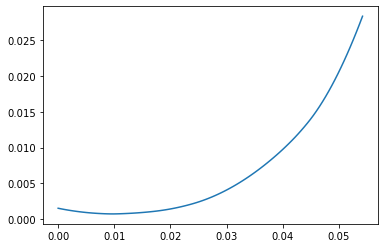

In [271]:
plt.plot(_x_, _y_)

In [193]:
m.Status

2

In [212]:
for v in m.getVars():
    print(f"{v.varName} {v.x}")
print(f"Obj: {m.ObjVal}")

theta[0] 2.9967336800775302e-15
theta[1] 5.0124122798693616e-15
theta[2] 2.2201773694767014e-15
theta[3] 0.9999999999999045
theta[4] 1.7450559642192375e-15
theta[5] 1.7167230361902699e-15
theta[6] 2.26864273627842e-15
theta[7] 4.240103581070907e-15
theta[8] 3.193036732290206e-15
theta[9] 7.244981549706565e-14
ArtP_R0 0.0657833680600991
ArtN_R0 5.610134801116019e-17
ArtP_R1 1.2444549360163272e-16
ArtN_R1 1.9178877812795747e-16
Obj: 0.009642405434218532


In [85]:
m.ObjVal

4.229676167389904

In [17]:
cov_inv = np.linalg.pinv(cov)

In [18]:
cov_inv

array([[ 0.6071205 , -0.077747  , -0.10036255, ...,  0.01290513,
        -0.0151957 , -0.24805271],
       [-0.077747  ,  1.88353884,  0.04483958, ...,  0.55389756,
         0.07748245,  0.65336161],
       [-0.10036255,  0.04483958,  1.17757454, ...,  0.26602834,
        -0.02892394,  0.50504744],
       ...,
       [ 0.01290513,  0.55389756,  0.26602834, ...,  1.88175621,
         0.21623355,  0.33979356],
       [-0.0151957 ,  0.07748245, -0.02892394, ...,  0.21623355,
         0.6977735 ,  0.08824456],
       [-0.24805271,  0.65336161,  0.50504744, ...,  0.33979356,
         0.08824456,  1.11217471]])

In [19]:
alpha = mu.dot(cov_inv).dot(mu)
beta = np.sum(cov_inv.dot(mu))
gamma = np.sum(cov_inv)
D = alpha*gamma - beta**2

In [20]:
def std(v):
    return math.sqrt((gamma*v**2 - 2*beta*v + alpha) / D)

In [21]:
_x = math.sqrt(1/gamma)
_y = beta/gamma

In [22]:
gamma

656.614686046454

In [23]:
y_l = np.linspace(_y, 2, 100).tolist()
#y_l = np.linspace(-0.2, 0.2, 100).tolist()
x_l = [std(x) for x in y_l]

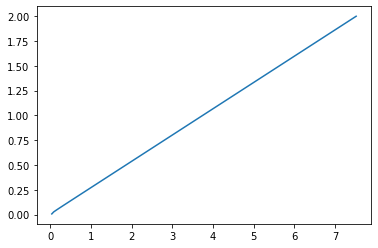

In [24]:
plt.plot(x_l, y_l)

In [25]:
_x

0.03902516104744246

In [26]:
_y

0.007111628189132144

In [273]:
df = pd.read_csv("./data/TBILL.csv", index_col='DATE')

In [28]:
#df = df['2020-01-01':]

In [29]:
rf_ret = np.log(df*0.01+1).mean().values[0]

In [30]:
rf_ret

0.012379591733893199

In [31]:
E = alpha - 2*beta *rf_ret + gamma*rf_ret**2

In [32]:
def CML(risk):
    return rf_ret + math.sqrt(E)*risk

In [33]:
line_x = np.linspace(0, 1, 1000).tolist()
line_y = [CML(x) for x in line_x]

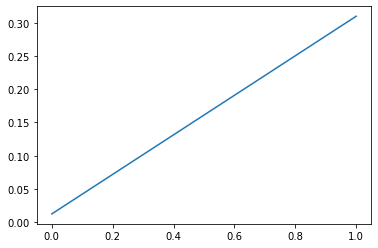

In [34]:
plt.plot(line_x, line_y)

In [35]:
sig_M = math.sqrt(E)/ (beta - rf_ret*gamma)
mu_M = rf_ret + E / (beta - rf_ret*gamma)

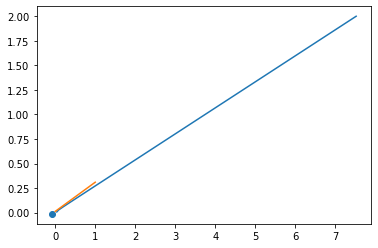

In [37]:
plt.plot(x_l, y_l)
plt.plot(line_x, line_y)
plt.scatter(sig_M, mu_M)
#plt.xlim((0.0000000002, 0.0000000005))
#plt.ylim((0.0, 0.2))

#plt.show()
#plt.xlim(())

In [133]:
rf_ret

0.012379591733893199

In [131]:
slope = (mu_M - rf_ret)/ sig_M

In [132]:
slope

243291934.9625565

In [266]:
A=100000000000
_x = slope/A
_y = slope*_x + rf_ret
util = _y - (A/2)*_x**2

In [269]:
util

295954.8404687158

In [267]:
_x

0.002432919349625565

In [268]:
A/2*_x**2 + _y

887864.496646964

In [270]:
_y = slope*_x + rf_ret

In [271]:
_y

591909.6685578399

In [272]:
def indiff(util, std_p, A=1):
    return util + (A/2) *(std_p**2)

In [300]:
x_i = np.linspace(0, 1, 1000).tolist()
y_i = [indiff(util, x, A) for x in x_i]

In [274]:
util

295954.8404687158

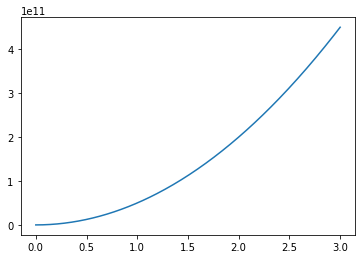

In [275]:
plt.plot(x_i, y_i)

(0.0, 1000000.0)

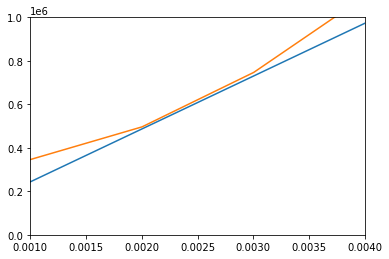

In [306]:
plt.plot(line_x, line_y)
plt.plot(x_i, y_i)
plt.xlim((0.001, 0.004))
plt.ylim((0, 1000000))

In [298]:
rf_ret

0.012379591733893199

(30000.0, 600000.0)

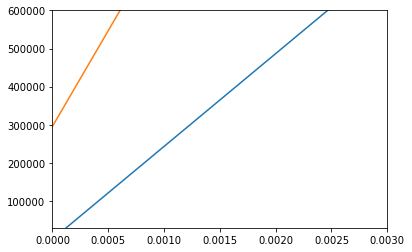

In [282]:
plt.plot(line_x, line_y)
plt.plot(x_i, y_i)
plt.xlim(0.0, 0.003)
plt.ylim(30000, 600000)

(0.0, 0.5)

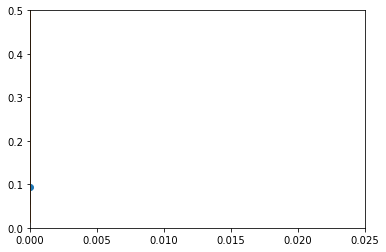

In [252]:
plt.plot(x_l, y_l)
plt.plot(line_x, line_y)
plt.scatter(sig_M, mu_M)
plt.plot(x_i, y_i)
#plt.xlim((0.0000000002, 0.0000000005))
#plt.xlim((0.000000000, 0.00000001))
#plt.ylim((0.0, 0.5))
plt.xlim((0, 0.025))
plt.ylim((, 0.5))